In [2]:
import yfinance as yf
import pandas as pd
import plotly.express as px

# Define the tickers
tickers = {
    'Bitcoin': 'BTC-USD',
}

# Download historical data for the tickers
data = yf.download(
    tickers=list(tickers.values()),
    period='max',       # Adjust the period as needed # Adjust the period as needed '6mo' '1d' 'max'
    interval='1d',     # Data interval Data interval '1m' '1h' '1d'       #best is w max and 1d so far 
    group_by='ticker',
    auto_adjust=True,
    threads=True
)

#print(data)

btc = data

#Flattening the multi-level columns
btc.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in btc.columns]

# Renaming the columns to remove prefixes and simplify names
new_column_names = {
    'Date': 'Date',
    'BTC-USD_Open': 'Open',
    'BTC-USD_High': 'High',
    'BTC-USD_Low': 'Low',
    'BTC-USD_Close': 'Close',
    'BTC-USD_Volume': 'Volume'
}
btc.rename(columns=new_column_names, inplace=True)

#Only for my pc

# Reset the index, which moves the date from the index to a column
btc.reset_index(inplace=True)

print(btc)

# Step 1: Extract Bitcoin Volume before dropping columns
print(btc['Volume'].eq(0).sum())
print(btc)




[*********************100%***********************]  1 of 1 completed

                          Date          Open          High           Low  \
0    2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
1    2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2    2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
3    2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
4    2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                        ...           ...           ...           ...   
3717 2024-11-20 00:00:00+00:00  92341.890625  94902.023438  91619.500000   
3718 2024-11-21 00:00:00+00:00  94334.640625  99014.218750  94132.601562   
3719 2024-11-22 00:00:00+00:00  98496.429688  99655.500000  97222.664062   
3720 2024-11-23 00:00:00+00:00  99006.742188  99014.679688  97232.890625   
3721 2024-11-24 00:00:00+00:00  97769.335938  98627.804688  95816.460938   

             Close        Volume  
0       457.334015      21056800  
1       424.44000

In [3]:
if 'Datetime' in btc.columns:
    btc.rename(columns={'Datetime': 'Date'}, inplace=True)
    btc = btc.drop(columns="Volume")

print(btc)

# Perform min-max normalization for each asset
normalized_prices = btc.copy() #closed_prices, crypto_df, non_crypto_df, btc, compiled



# Exclude the 'Date' column during normalization
for col in normalized_prices.columns[1:]:
    min_price = normalized_prices[col].min()
    max_price = normalized_prices[col].max()
    normalized_prices[col] = ((normalized_prices[col] - min_price) / (max_price - min_price)) * 100

# Melt the DataFrame to long format
normalized_prices_melted = normalized_prices.melt(id_vars='Date', var_name='Asset', value_name='Normalized Price')

# Create the line plot
fig = px.line(
    normalized_prices_melted,
    x='Date',
    y='Normalized Price',
    color='Asset',
    labels={'Normalized Price': 'Normalized Price (0% = Min, 100% = Max)', 'Date': 'Date', 'Asset': 'Asset'},
    title='Min-Max Normalized Closing Prices for Selected Assets Over Time'
)

# Show the plot
fig.show()
btc.rename(columns={'Close': 'Bitcoin Close'}, inplace=True)
print(btc)

                          Date          Open          High           Low  \
0    2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
1    2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2    2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
3    2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
4    2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                        ...           ...           ...           ...   
3717 2024-11-20 00:00:00+00:00  92341.890625  94902.023438  91619.500000   
3718 2024-11-21 00:00:00+00:00  94334.640625  99014.218750  94132.601562   
3719 2024-11-22 00:00:00+00:00  98496.429688  99655.500000  97222.664062   
3720 2024-11-23 00:00:00+00:00  99006.742188  99014.679688  97232.890625   
3721 2024-11-24 00:00:00+00:00  97769.335938  98627.804688  95816.460938   

             Close        Volume  
0       457.334015      21056800  
1       424.44000

                          Date          Open          High           Low  \
0    2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
1    2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2    2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
3    2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
4    2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                        ...           ...           ...           ...   
3717 2024-11-20 00:00:00+00:00  92341.890625  94902.023438  91619.500000   
3718 2024-11-21 00:00:00+00:00  94334.640625  99014.218750  94132.601562   
3719 2024-11-22 00:00:00+00:00  98496.429688  99655.500000  97222.664062   
3720 2024-11-23 00:00:00+00:00  99006.742188  99014.679688  97232.890625   
3721 2024-11-24 00:00:00+00:00  97769.335938  98627.804688  95816.460938   

      Bitcoin Close        Volume  
0        457.334015      21056800  
1        424.44

           BB_upper      BB_lower      KC_upper      KC_lower  squeeze
3712   92972.022416  59897.634615  84065.122428  73257.785318        0
3713   94737.582960  60394.992040  85220.344669  74368.662637        0
3714   96171.873237  60954.511138  86178.684062  75324.865703        0
3715   97613.249395  61295.349824  87062.839849  76305.636724        0
3716   99158.922184  61750.102035  88234.209184  77164.658013        0
3717  100693.446217  62628.008471  89358.589513  78257.431701        0
3718  102653.733675  63569.946794  90915.949599  79499.446083        0
3719  104231.404131  64963.115400  92349.219949  80692.835965        0
3720  105029.745048  67068.390890  93413.943291  81772.160869        0
3721  105106.169256  69964.651838  94374.751352  82705.697055        0
Rescaled Data:
          Open      High       Low  Bitcoin Close    Volume     EMA_5  \
0    -0.881966 -0.882546 -0.881391      -0.882043 -0.918462 -0.883755   
1    -0.882400 -0.883078 -0.883328      -0.883624 -0.91778

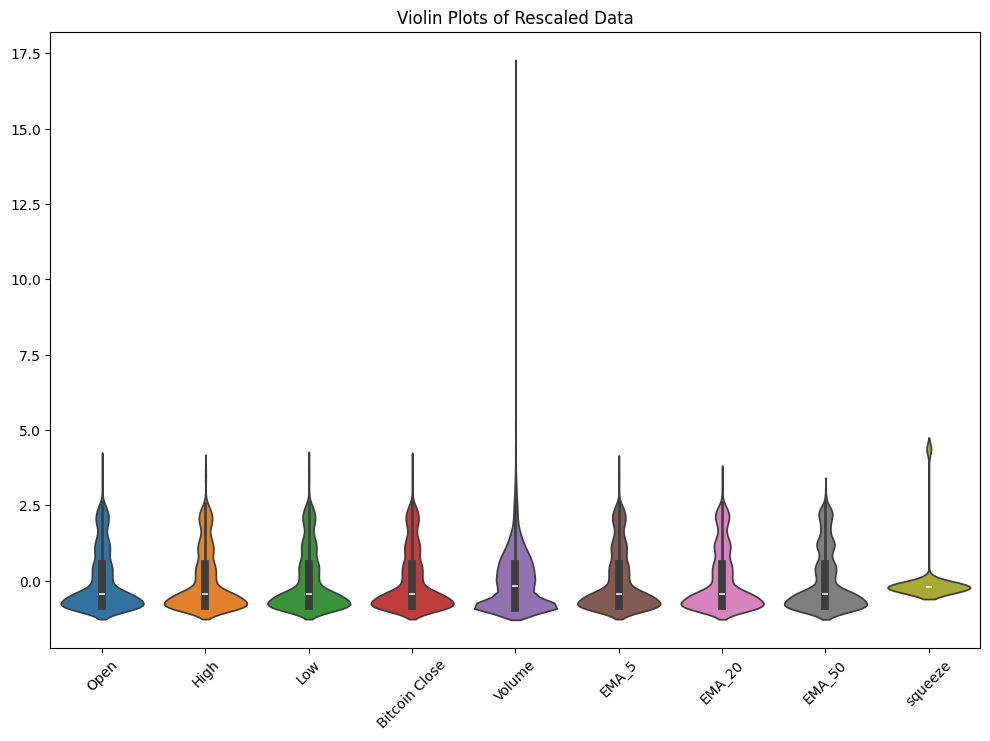

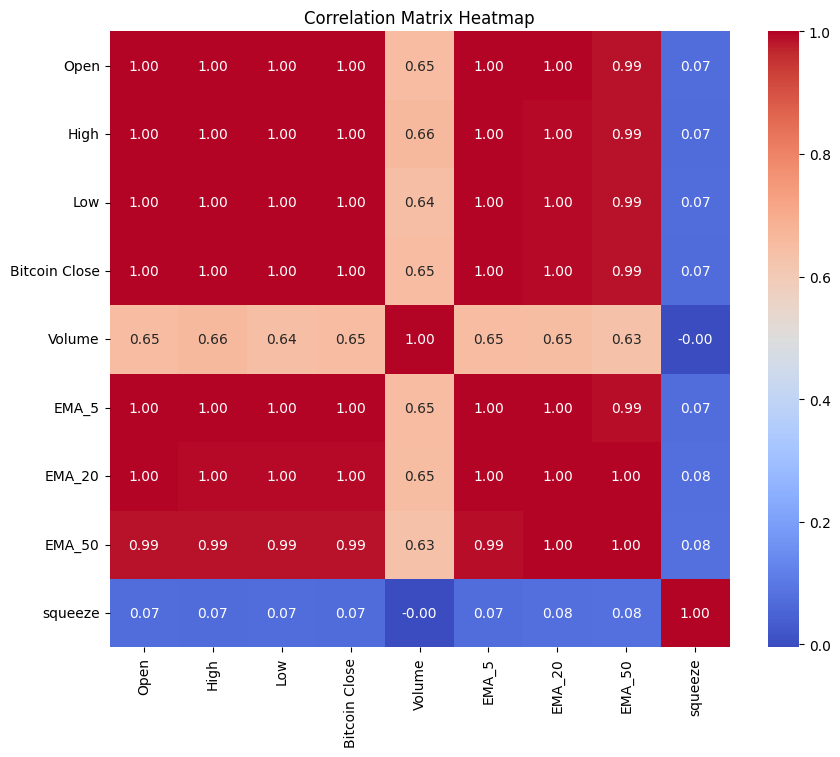

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

btc['EMA_5'] = btc['Bitcoin Close'].ewm(span=5, adjust=False).mean()
btc['EMA_20'] = btc['Bitcoin Close'].ewm(span=20, adjust=False).mean()
btc['EMA_50'] = btc['Bitcoin Close'].ewm(span=50, adjust=False).mean()

# Parameters
bb_length = 20
bb_std_dev = 2
kc_length = 20
kc_multiplier = 1.5

# Calculate Bollinger Bands
rolling_mean = btc['Bitcoin Close'].rolling(window=bb_length).mean()
rolling_std = btc['Bitcoin Close'].rolling(window=bb_length).std()
btc['BB_upper'] = rolling_mean + (bb_std_dev * rolling_std)
btc['BB_lower'] = rolling_mean - (bb_std_dev * rolling_std)

# Calculate True Range and Average True Range for Keltner Channels
true_range = np.maximum(
    btc['High'] - btc['Low'],
    np.maximum(abs(btc['High'] - btc['Bitcoin Close'].shift(1)),
               abs(btc['Low'] - btc['Bitcoin Close'].shift(1)))
)
average_true_range = true_range.rolling(window=kc_length).mean()
keltner_middle = btc['Bitcoin Close'].ewm(span=kc_length, adjust=False).mean()
btc['KC_upper'] = keltner_middle + (kc_multiplier * average_true_range)
btc['KC_lower'] = keltner_middle - (kc_multiplier * average_true_range)

# Define squeeze condition
btc['squeeze'] = np.where(
    (btc['BB_lower'] > btc['KC_lower']) & (btc['BB_upper'] < btc['KC_upper']),
    1,  # Squeeze is on
    0   # Squeeze is off
)

# Check intermediate values
print(btc[['BB_upper', 'BB_lower', 'KC_upper', 'KC_lower', 'squeeze']].tail(10))
btc.drop(columns=['BB_upper', 'BB_lower', 'KC_upper', 'KC_lower'], inplace=True)

#Converts Close to Percentage ################################################################################
#btc['Bitcoin Close'] = btc['Bitcoin Close'].pct_change() * 100
#btc = btc.dropna().reset_index(drop=True)

def global_rescale(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    # Avoid division by zero if data has zero variance
    if std_val == 0:
        rescaled_data = np.zeros_like(data)
    else:
        rescaled_data = (data - mean_val) / std_val
    return rescaled_data

if 'Date' in btc.columns:
    btc = btc.drop(columns='Date')
# Apply the global_rescale function to each column
rescaled_data = btc.apply(global_rescale) #Compiled, use 'data' hear to implement hgih and low prices but must realize this df is lvl1 and lvl 0 # Also use 'btc' for strictly bitcoin

rescaled_data.dropna(inplace=True)

print("Rescaled Data:")
print(rescaled_data)

#rescaled_data = rescaled_data.drop(columns=['Date'])

# Compute basic statistics for each column
stats = rescaled_data.describe()

# Print the statistics
print("\nBasic Statistical Summary:")
print(stats)

# Plot violin plots for each column
plt.figure(figsize=(12, 8))
sns.violinplot(data=rescaled_data)
plt.title('Violin Plots of Rescaled Data')
plt.xticks(rotation=45)
plt.show()

# Compute the correlation matrix
corr_matrix = rescaled_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import numpy as np
import pandas as pd
from torch import nn
from skorch import NeuralNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

print(rescaled_data)

# Perform train test split suitable for time series data such that the test set is the most recent data

test_size = 0.2
split_index = int(len(rescaled_data) * (1 - test_size))

X_train, X_test = rescaled_data.iloc[:split_index, :], rescaled_data.iloc[split_index:, :]
y_train, y_test = rescaled_data['Bitcoin Close'][:split_index], rescaled_data['Bitcoin Close'][split_index:]

print("another set")
print(X_train)
print("another set")
print(y_train)
print("another set")
print(X_test)
print("another set")
print(y_test)



          Open      High       Low  Bitcoin Close    Volume     EMA_5  \
0    -0.881966 -0.882546 -0.881391      -0.882043 -0.918462 -0.883755   
1    -0.882400 -0.883078 -0.883328      -0.883624 -0.917780 -0.884285   
2    -0.883977 -0.884445 -0.884736      -0.885049 -0.917606 -0.885115   
3    -0.885394 -0.884659 -0.884472      -0.884371 -0.917659 -0.885442   
4    -0.884748 -0.885171 -0.884310      -0.884855 -0.918181 -0.885821   
...        ...       ...       ...            ...       ...       ...   
3717  3.541589  3.564271  3.610256       3.630261  2.722304  3.526501   
3718  3.637534  3.757912  3.734073       3.830457  4.463414  3.634749   
3719  3.837912  3.788109  3.886315       3.854149  3.064632  3.714850   
3720  3.862482  3.757933  3.886819       3.795494  1.335434  3.748605   
3721  3.802904  3.739716  3.817034       3.784010  1.564977  3.767263   

        EMA_20    EMA_50   squeeze  
0    -0.888024 -0.893020 -0.229351  
1    -0.888177 -0.893084 -0.229351  
2    -0.8884

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV
from skorch.callbacks import EpochScoring


# Create sequences for LSTM
##  START CODE  ##
def create_sequences(data, target, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:(i + seq_length)].to_numpy())
        y.append(target.iloc[i + seq_length])
    return np.array(X), np.array(y)

print("y_train")
print(y_train.describe())
print("y_test")
print(y_test.describe())

# Creating sequences with a length of 10 time steps
seq_length = 5
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

print("y_test_seq")
print(y_test_seq)

# Convert to torch tensors
X_train_seq = torch.tensor(X_train_seq, dtype=torch.float32)
y_train_seq = torch.tensor(y_train_seq, dtype=torch.float32).reshape(-1, 1)
X_test_seq = torch.tensor(X_test_seq, dtype=torch.float32)
y_test_seq = torch.tensor(y_test_seq, dtype=torch.float32).reshape(-1, 1)
##  END CODE  ##

class MyLSTMModule(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1, nonlin=nn.ReLU()):
        super().__init__()
        # Define an LSTM layer instead of a simple RNN
        ##  START CODE  ##
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.nonlin = nonlin
        self.fc = nn.Linear(hidden_size, 1)  # Final output layer for regression with 1 output neuron
        ##  END CODE  ##

    def forward(self, X):
        # Forward pass through LSTM
        ##  START CODE  ##
        out, _ = self.lstm(X)  # out shape: (batch_size, seq_length, hidden_size)
        out = out[:, -1, :]  # Take output at the last time step (batch_size, hidden_size)
        out = self.nonlin(out)  # Apply non-linearity
        out = self.fc(out)  # Final linear layer for regression output (batch_size, 1)
        ##  END CODE  ##
        return out


# define a NeuralNetRegressor() with batch size 256, torch.optim.Adam optimizer and torch.nn.MSELoss as the criterion
# IMPORTANT: also use iterator_train__shuffle=True to shuffle the training data during the training process
##  START CODE  ##
net = NeuralNetRegressor(
    MyLSTMModule,
    module__input_size=X_train_seq.shape[2],  # Use the number of features as input_size
    module__hidden_size=32,
    module__num_layers=1,
    module__nonlin=torch.nn.ReLU(),
    max_epochs=20,
    lr=0.01,
    batch_size=256,
    optimizer=torch.optim.Adam,
    criterion=torch.nn.MSELoss,# Use Mean Squared Error Loss for regression
)
##  END CODE  ##

# deactivate skorch-internal train-valid split and verbose logging
net.set_params(train_split=False, verbose=0)

# define the parameters you want to search over as a dict
##  START CODE  ##

#in use
params = {
    'lr': [.05,0.01,.005],
    'max_epochs': [50],
    'module__hidden_size': [32,64,128],
    'module__num_layers': [1,2,3],
    'batch_size': [64,128,256],
    'optimizer': [torch.optim.Adam, torch.optim.SGD, torch.optim.RMSprop],
    'module__nonlin': [torch.nn.ReLU(), torch.nn.Sigmoid(), torch.nn.Tanh(), torch.nn.LeakyReLU()],
} 

params = {
    'lr': [0.01],
    'max_epochs': [50],
    'module__hidden_size': [32],
    'module__num_layers': [1],
    'batch_size': [64],
    'optimizer': [torch.optim.Adam],
    'module__nonlin': [torch.nn.ReLU()],
}

##  END CODE  ##

# define your GridSearchCV()
# IMPORTANT: use cv=3, scoring='neg_mean_squared_error' (to obtain best model based on lowest error)
# and refit=True (to retrain the model using the best hyperparams for later use i.e. evaluation).
##  START CODE  ## (1 line of code)
gs = GridSearchCV(net, params, refit=True, cv=10, scoring='neg_mean_squared_error', verbose=2)

# train your model
##  START CODE  ## (1 line of code)
# Fit the model
print('Sample X_train sequences:')
for i in range(min(5, len(X_train_seq))):
    print(f'X_train_seq[{i}]: {X_train_seq[i]}')
print('Sample y_train sequences:')
for i in range(min(5, len(y_train_seq))):
    print(f'y_train_seq[{i}]: {y_train_seq[i]}')

print("y_test_seq")
print(y_test_seq)
gs.fit(X_train_seq, y_train_seq)
##  END CODE  ##

# print best params
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))
#best score: -0.092, best params: {'batch_size': 64, 'lr': 0.01, 'max_epochs': 50, 'module__hidden_size': 32, 'module__nonlin': ReLU(), 'module__num_layers': 1, 'optimizer': <class 'torch.optim.adam.Adam'>}
#Test MSE: 0.03
#Test R2: 0.10



y_train
count    2977.000000
mean       -0.289063
std         0.784161
min        -0.895464
25%        -0.872146
50%        -0.573332
75%        -0.140738
max         2.343474
Name: Bitcoin Close, dtype: float64
y_test
count    745.000000
mean       1.155087
std        0.934181
min       -0.145232
25%        0.386530
50%        0.886541
75%        2.092005
max        3.854149
Name: Bitcoin Close, dtype: float64
y_test_seq
[-1.02832595e-01 -1.01963697e-01 -1.01470577e-01 -1.00808765e-01
 -1.20981726e-01 -1.45232058e-01 -1.25887206e-01 -1.05655480e-01
 -1.05955501e-01 -1.09926654e-01 -1.12693215e-01 -1.13637869e-01
 -1.24562926e-01 -1.13620784e-01 -7.88428103e-02 -8.85244123e-02
 -8.26833838e-02 -9.13551830e-02 -8.06730719e-02 -8.81546426e-02
 -8.26428302e-02 -9.42442495e-02 -7.57230954e-02 -8.05449338e-02
 -8.07577462e-02 -8.19368038e-02 -7.70225933e-02 -4.93918115e-02
 -4.77416942e-02 -6.94080031e-02 -1.03887833e-01 -9.67933044e-02
 -9.85771921e-02 -1.13875652e-01 -9.14480244e-02 -9.57

Test MSE: 0.03
Test R2: 0.97


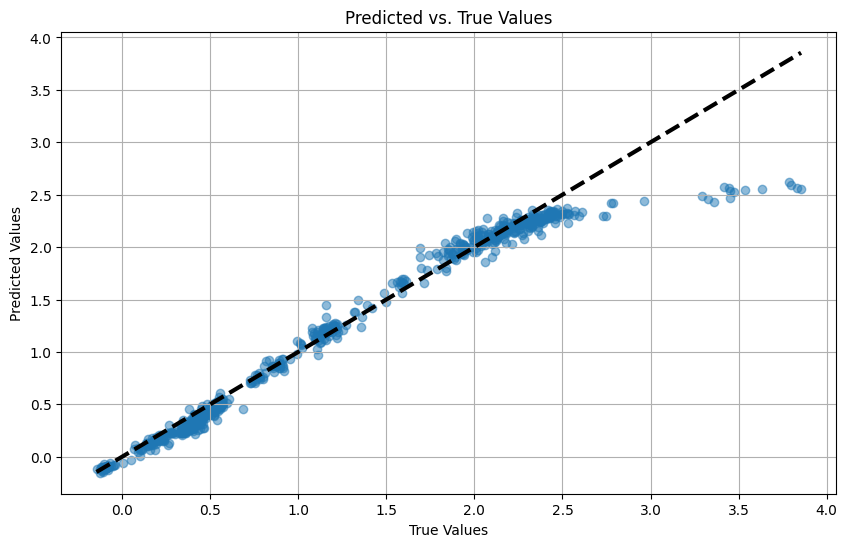

[{'batches': [{'train_loss': 0.8513926267623901, 'train_batch_size': 64}, {'train_loss': 0.7206476926803589, 'train_batch_size': 64}, {'train_loss': 0.5289060473442078, 'train_batch_size': 64}, {'train_loss': 0.3821731209754944, 'train_batch_size': 64}, {'train_loss': 0.2435997873544693, 'train_batch_size': 64}, {'train_loss': 0.13132187724113464, 'train_batch_size': 64}, {'train_loss': 0.045805998146533966, 'train_batch_size': 64}, {'train_loss': 0.005062417592853308, 'train_batch_size': 64}, {'train_loss': 0.0029767139349132776, 'train_batch_size': 64}, {'train_loss': 0.02544797584414482, 'train_batch_size': 64}, {'train_loss': 0.0355837456882, 'train_batch_size': 64}, {'train_loss': 0.06857524067163467, 'train_batch_size': 64}, {'train_loss': 0.0751209557056427, 'train_batch_size': 64}, {'train_loss': 0.07213498651981354, 'train_batch_size': 64}, {'train_loss': 0.06084092706441879, 'train_batch_size': 64}, {'train_loss': 0.059691328555345535, 'train_batch_size': 64}, {'train_loss': 

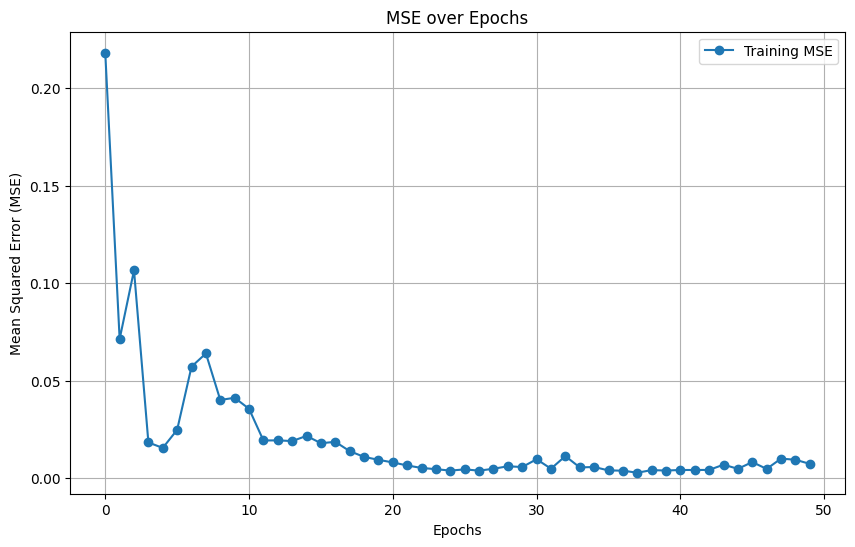

In [9]:
from sklearn.metrics import r2_score, mean_squared_error
# Evaluate the model on the test set
##  START CODE  ##
# Assuming `gs` is already defined and used GridSearchCV with a NeuralNetRegressor
net = gs.best_estimator_

# Get predictions on the test data
y_pred_test = net.predict(X_test_seq)

# Since it's a regression task, we should use a regression metric instead of accuracy_score
# Calculate the R2 score and MSE for the test data
test_mse = mean_squared_error(y_test_seq, y_pred_test)
test_r2 = r2_score(y_test_seq, y_pred_test)

print(f"Test MSE: {test_mse:.2f}")
print(f"Test R2: {test_r2:.2f}")

# Detach tensors and convert to numpy arrays if needed
y_pred_test = y_pred_test if isinstance(y_pred_test, np.ndarray) else y_pred_test.detach().numpy()
y_test_seq = y_test_seq if isinstance(y_test_seq, np.ndarray) else y_test_seq.detach().numpy()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_seq, y_pred_test, alpha=0.5)
plt.title('Predicted vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([y_test_seq.min(), y_test_seq.max()], [y_test_seq.min(), y_test_seq.max()], 'k--', lw=3)  # Line showing perfect predictions
plt.grid(True)
plt.show()
##  END CODE  ##







print(net.history)

##  START CODE ##
history = net.history

# Extract training and validation MSE from the history
train_mse = [h['train_loss'] for h in history]
valid_mse = [h['valid_loss'] for h in history if 'valid_loss' in h]

plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='Training MSE', marker='o')
#plt.plot(valid_mse, label='Validation MSE', marker='o')
plt.title('MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()